In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
from functools import partial
import matplotlib
import numpy as np

import set_rcParams

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-11"

/tmp/ipykernel_1519658/2767966227.py:28: UserWarning: The following kwargs were not used by contour: 's'
  axs[i].contourf(prod_space[0] * np.cos(prod_space[1]), prod_space[0] * np.sin(prod_space[1]), to_plot[i], levels=lvls, s=2, cmap="Blues", norm=norm)


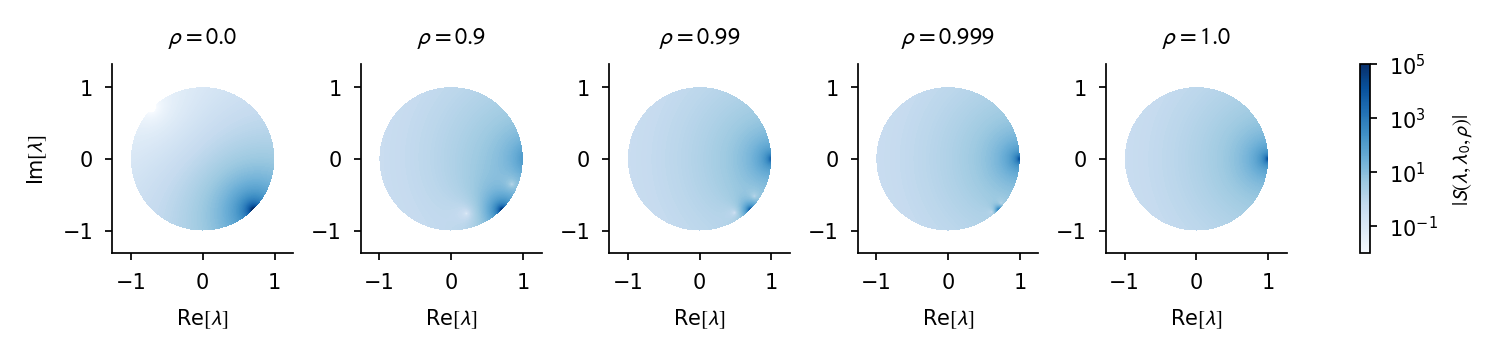

In [9]:
def estimate(l1, l2, r):
    p1 = (1 - r) * (1 + l1 * l2)
    p2 = r ** 2 * (1 - l1 * l2) ** 3
    p3 = - r * (1 - r) * l1 * l2 * (2 * l1 + 2 * l2 - r * l1 * l2 * (1 + l1 * l2))
    den = (1 - r * l1) ** 2 * (1 - r * l2) ** 2 * (1 - l1 * l2) ** 3
    return (p1 + p2 + p3) / den

lambda_0 = 0.99 * np.exp(1.j * jnp.pi / 4)

# Create a 1 x 5 grid
nu = np.linspace(0, 0.99, 200)
theta = np.linspace(-1, 1, 500) * np.pi
prod_space = np.meshgrid(nu, theta)

rhos = [0., 0.9, 0.99, 0.999, 1.]
to_plot = [jax.vmap(lambda n, t: jnp.abs(estimate(n * jnp.exp(1.j * t), lambda_0, rho)))(prod_space[0], prod_space[1]) for rho in rhos]
mini, maxi = min([jnp.abs(jnp.min(a)) for a in to_plot]), max([jnp.abs(jnp.max(a)) for a in to_plot])

# normalize with mpl
import matplotlib
norm = matplotlib.colors.LogNorm(vmin=1e-2, vmax=1e5)

lvls = jnp.logspace(-2 ,5, 200)

fig, axs = plt.subplots(1, len(rhos), figsize=(6.5, 1.5))
row = 0
for i, rho in enumerate(rhos):
    axs[i].contourf(prod_space[0] * np.cos(prod_space[1]), prod_space[0] * np.sin(prod_space[1]), to_plot[i], levels=lvls, s=2, cmap="Blues", norm=norm)
    # axs[i].scatter(prod_space[0] * np.cos(prod_space[1]), prod_space[0] * np.sin(prod_space[1]), c=to_plot[i], s=0.5, cmap="Blues", norm=norm)  # ONLY PNG, otherwise pdf reader bugs
    axs[i].axis('equal')
    axs[i].set_title(fr"$\rho = {rho}$", fontsize=7)
    axs[i].locator_params(axis='x', nbins=3)
    axs[i].locator_params(axis='y', nbins=3)

    # Black dot for lambda_0
    #axs[i].scatter(lambda_0.real, lambda_0.imag, color="black", s=3)
    #axs[i].text(lambda_0.real+0.05, lambda_0.imag+0.05, fr"$\lambda_0$", fontsize=6)

    axs[i].set_xlabel(fr"Re$[\lambda]$")
    if i == 0:
        axs[i].set_ylabel(fr"Im$[\lambda]$")

plt.tight_layout(pad=1)

mappable = axs[-1].collections[0]
label = r"$|S(\lambda, \lambda_0, \rho)|$" if row == 0 else r"$\mathrm{angle} [S(\lambda, \lambda_0, \rho)]$"
plt.colorbar(mappable, ax=axs.ravel().tolist(), orientation='vertical', label=label, ticks=[0.1, 10, 1000, 100000])

plt.savefig("raw/RNNs_figureD_raw.pdf", bbox_inches='tight', dpi=1000)